# PGS data processing

This script is specifically designed to automate the process of downloading Alzheimer's Disease (AD) research data from the PGS catalog. It focuses on extracting files from FTP links provided in a CSV file and ensures that downloaded data undergoes preliminary data cleaning and quality control.

Script Purpose
*  Targeted Downloading: Automates the downloading of AD research data files from the PGS catalog, addressing the needs of researchers focusing on genetic contributions to Alzheimer's Disease.
* Data Cleaning and Quality Control: While the script prepares data for cleaning and quality checks, these processes are conducted separately to ensure data integrity and usability.
s.


## Import Libs

In [1]:
# import packages 
import pandas as pd
import requests
import os
import gzip
import os
from tqdm import tqdm
import re
import numpy as np

## Data Download And Decompress
1. **Reads the CSV**: Loads the CSV file and extracts file URLs from the specified column.
2. **Downloads Files**: Downloads each file from its URL to the specified folder.
3. **Checks Existing Files**: Prevents re-downloading files that already exist.
4. **Logs Status**: Outputs the status of each file download, noting both successes and failures.
5. **Decompress**: Outputs the decompressed data

In [2]:
# Set the path to the CSV file and the download directory
csv_file_path = os.path.join(r"", "pgs_scores_lungcancer.csv")
download_folder = os.path.join(r"", "CancerPGS")

# Ensure the download directory exists
os.makedirs(download_folder, exist_ok=True)
# Specify the directory where decompressed files should be stored
decompression_folder = os.path.join(download_folder, "PGS_Decompress")

# Ensure the decompression directory exists
os.makedirs(decompression_folder, exist_ok=True)

In [3]:

# Read the CSV data
df = pd.read_csv(csv_file_path)
compressed_files = []
# Process each row to handle file downloads and renaming
for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Downloading and decompressing files"):
    file_url = row['Scoring File (FTP Link)']  # Extract the FTP link
    original_filename = file_url.split('/')[-1]  # Get the original filename from the URL
    
    core_filename = original_filename.split('.')[0]  # Extract the core identifier before the first '.'

    file_url = file_url.replace(original_filename, 'Harmonized/'+core_filename +'_hmPOS_GRCh38.txt.gz')
    file_path = os.path.join(download_folder, core_filename +'_hmPOS_GRCh38.txt.gz')  # Update the path with the new filename
    compressed_files.append(core_filename +'_hmPOS_GRCh38.txt.gz')
    # Check if the new file already exists
    if not os.path.exists(file_path):
        try:
            print(f"Downloading and renaming {original_filename} to {core_filename}...")
            response = requests.get(file_url, stream=True)
            if response.status_code == 200:
                with open(file_path, 'wb') as f:
                    f.write(response.content)
            else:
                print(f"Failed to download {original_filename}. Status code: {response.status_code}")
        except Exception as e:
            print(f"An error occurred while downloading {original_filename}: {e}")
    else:
        print(f"{new_filename} already exists.")
print(f'Download complete!')

NameError: name 'new_filename' is not defined

In [8]:
# Get a list of all .gz files in the download directory
gz_files = [f for f in os.listdir(download_folder) if f.endswith('.gz')]
i = 0
# Iterate over the list of files and decompress each one
for gz_file in tqdm(gz_files, desc='Decompressing files'):
    i += 1
    print(i)
    file_path = os.path.join(download_folder, gz_file)
    decompressed_file_path = os.path.join(decompression_folder, gz_file[:-3])  # Removes '.gz'

    # Open the gzipped file and decompress it
    with gzip.open(file_path, 'rb') as gzipped_file:
        with open(decompressed_file_path, 'wb') as decompressed_file:
            decompressed_file.write(gzipped_file.read())
            print(f"Decompressed {gz_file} to {decompressed_file_path}")

print("All files have been decompressed!")

Decompressing files:   3%|█▊                                                            | 1/34 [00:00<00:05,  5.65it/s]

1
Decompressed PGS000388_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS000388_hmPOS_GRCh38.txt
2
Decompressed PGS000391_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS000391_hmPOS_GRCh38.txt
3
Decompressed PGS000389_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS000389_hmPOS_GRCh38.txt
4
Decompressed PGS000390_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS000390_hmPOS_GRCh38.txt
5


Decompressing files:  24%|██████████████▌                                               | 8/34 [00:00<00:01, 16.85it/s]

Decompressed PGS000393_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS000393_hmPOS_GRCh38.txt
6
Decompressed PGS000721_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS000721_hmPOS_GRCh38.txt
7
Decompressed PGS000392_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS000392_hmPOS_GRCh38.txt
8
Decompressed PGS000394_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS000394_hmPOS_GRCh38.txt
9
Decompressed PGS003393_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS003393_hmPOS_GRCh38.txt
10


Decompressing files:  29%|█████████████████▉                                           | 10/34 [00:00<00:01, 14.63it/s]

Decompressed PGS000395_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS000395_hmPOS_GRCh38.txt
11
Decompressed PGS003392_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS003392_hmPOS_GRCh38.txt
12
Decompressed PGS005169_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS005169_hmPOS_GRCh38.txt
13
Decompressed PGS004164_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS004164_hmPOS_GRCh38.txt
14
Decompressed PGS003391_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS003391_hmPOS_GRCh38.txt
15
Decompressed PGS000396_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS000396_hmPOS_GRCh38.txt
16
Decompressed PGS004246_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS004246_hmPOS_GRCh38.txt
17
Decompressed PGS004165_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS004165_hmPOS_GRCh38.txt
18
Decompressed PGS000397_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS000397_hmPOS_GRCh38.txt
19
Decompressed PGS004325_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS004325_hmPOS_GRCh

Decompressing files:  65%|███████████████████████████████████████▍                     | 22/34 [00:00<00:00, 29.12it/s]

Decompressed PGS004442_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS004442_hmPOS_GRCh38.txt
23
Decompressed PGS005163_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS005163_hmPOS_GRCh38.txt
24
Decompressed PGS002270_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS002270_hmPOS_GRCh38.txt
25


Decompressing files:  74%|████████████████████████████████████████████▊                | 25/34 [00:01<00:00, 18.28it/s]

Decompressed PGS004860_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS004860_hmPOS_GRCh38.txt
26
Decompressed PGS000078_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS000078_hmPOS_GRCh38.txt
27
Decompressed PGS004955_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS004955_hmPOS_GRCh38.txt
28


Decompressing files:  94%|█████████████████████████████████████████████████████████▍   | 32/34 [00:01<00:00, 18.56it/s]

Decompressed PGS004691_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS004691_hmPOS_GRCh38.txt
29
Decompressed PGS000740_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS000740_hmPOS_GRCh38.txt
30
Decompressed PGS000880_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS000880_hmPOS_GRCh38.txt
31
Decompressed PGS000070_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS000070_hmPOS_GRCh38.txt
32
Decompressed PGS004884_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS004884_hmPOS_GRCh38.txt
33
Decompressed PGS000156_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS000156_hmPOS_GRCh38.txt
34


Decompressing files: 100%|█████████████████████████████████████████████████████████████| 34/34 [00:01<00:00, 17.21it/s]

Decompressed PGS004512_hmPOS_GRCh38.txt.gz to CancerPGS/PGS_Decompress/PGS004512_hmPOS_GRCh38.txt
All files have been decompressed!


## Data Cleaning

### Step 1
1. **Annotation**: we run the pipeline to annotate the files and fill the missing data with NA
2. **Removing the unknown rsID**: remove the unknown rsID
3. **File selection**: exclude the file raise errors

### For Files with issues, we annoate the hm_rsID

In [5]:
# exclude_filenames = ['PGS003957','PGS003958']
exclude_filenames = []

### Step 2
1. **scan all files and get a annotation map**: the annotation map has columns of ['SNP_coord', 'hm_rsID', 'hm_chr', 'hm_pos', 'effect_allele'] with no duplicate variants

In [10]:
# Define the directory containing your CSV files
directory = r'/Users/martinli/Desktop/CancerGeneBot/Notebook/CancerPGS/AnnotatedClean_ReAnnoted'

# List to store DataFrames
dataframes = []
i = 0
# Loop through all the CSV files in the directory
for filename in os.listdir(directory):
    i += 1
    print(i)
    if filename.endswith('.csv'):  # Check if the file is a CSV
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath, low_memory=False)  # Read the CSV file
        dataframes.append(df)  # Append the DataFrame to the list

# Concatenate all DataFrames into a single DataFrame
full_df = pd.concat(dataframes, ignore_index=True)

# Select unique rows based on specific columns
annotation_map = full_df[['SNP_coord', 'hm_rsID', 'hm_chr', 'hm_pos', 'effect_allele']].drop_duplicates()

# Optionally, save the unique DataFrame to a new CSV file
annotation_map.to_csv(r'/Users/martinli/Desktop/CancerGeneBot/data/annotation_map.csv', index=False)

# Print the unique DataFrame
print(annotation_map)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
            SNP_coord      hm_rsID hm_chr       hm_pos effect_allele
0          4_12348664   rs73225917      4   12348664.0             A
1        11_119542229          NaN     11  119542229.0             T
2          4_46680688  rs138116934      4   46680688.0             T
3         17_65392050          NaN     17   65392050.0             C
4          1_17117119  rs116308950      1   17117119.0             A
...               ...          ...    ...          ...           ...
9365873    10_2169843    rs1984070     10    2169843.0             A
9365881   1_217334283   rs12124075      1  217334283.0             T
9365883    6_32789520    rs9276711      6   32789520.0             T
9365894    6_29970056    rs2256543      6   29970056.0             T
9365895    6_33314404    rs3130099      6   33314404.0             G

[3053308 rows x 5 columns]


### Step 3
1. **Detect duplicates**: Duplicate CSV files are defined as the files containing the same set of rsID
2. **Merge duplicates**: Convert the effect weight to z-score and merge the duplicates by sum, append the ranks into a list

In [7]:
### CLEAN STEP 3

import os, re, pickle, hashlib
import numpy as np
import pandas as pd
from collections import Counter
from typing import Dict, List, Tuple

# --------- CONFIG ---------
ANNOTATED_DIR = r"/Users/martinli/Desktop/CancerGeneBot/Notebook/CancerPGS/AnnotatedClean_ReAnnoted"
OUT_PKL      = r"/Users/martinli/Desktop/CancerGeneBot/Notebook/CancerPGS/data_dict.pkl"
MAX_N_SWEEP  = 500
FRACTION     = 0.90   # target fraction of max overlap for choosing N

# --------- UTILITIES ---------
class UnionFind:
    def __init__(self):
        self.parent = {}
    def find(self, x):
        # robust find (auto-initialize)
        if x not in self.parent:
            self.parent[x] = x
            return x
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]
    def union(self, x, y):
        rx, ry = self.find(x), self.find(y)
        if rx != ry:
            self.parent[ry] = rx

def extract_file_id(filename:str):
    m = re.match(r"(PGS\d+)_", filename)
    return m.group(1) if m else None

def _as_nonnull_str_set(series: pd.Series) -> set:
    # dropna and cast to str to avoid NaN set-equality weirdness
    return set(series.dropna().astype(str).tolist())

def _build_SNP_coord_if_missing(df: pd.DataFrame) -> pd.DataFrame:
    if 'SNP_coord' in df.columns:
        return df
    # Try common chr/pos pairs
    candidates = [
        ('hm_chr','hm_pos'),
        ('chrom','pos'),
        ('chr','pos')
    ]
    for c, p in candidates:
        if c in df.columns and p in df.columns:
            # keep integer when possible; fall back to string
            pos = pd.to_numeric(df[p], errors='coerce').astype('Int64')
            df = df.copy()
            df['SNP_coord'] = df[c].astype(str).str.strip() + ":" + pos.astype(str)
            return df
    # If we cannot build it, just create empty placeholder
    df = df.copy()
    df['SNP_coord'] = pd.Series([pd.NA] * len(df))
    return df

def find_duplicate_files(folder_path: str):
    """
    Flags studies that are duplicates by exact set equality on SNP_coord or hm_rsID.
    Returns: (groups, file_data)
      - groups: dict[root_id] = [member_ids...]
      - file_data: dict[file_id] = raw DataFrame (with SNP_coord ensured)
    """
    uf = UnionFind()
    file_sets = {}
    file_data = {}

    files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]
    print(f"[Step 1] Scanning {len(files)} CSVs in: {folder_path}")

    for fn in files:
        fid = extract_file_id(fn)
        if not fid:
            continue
        path = os.path.join(folder_path, fn)
        df = pd.read_csv(path)
        df = _build_SNP_coord_if_missing(df)

        # seed UF
        uf.find(fid)

        if ('SNP_coord' in df.columns) and ('hm_rsID' in df.columns):
            snp_set = _as_nonnull_str_set(df['SNP_coord'])
            rsid_set = _as_nonnull_str_set(df['hm_rsID'])
            file_sets[fid] = {'SNP_coord': snp_set, 'hm_rsID': rsid_set}
            file_data[fid] = df
        else:
            print(f"  - Skipping {fn}: missing required columns.")

    ids = list(file_sets.keys())
    print(f"  Collected {len(ids)} candidate studies for duplicate check.")

    for i in range(len(ids)):
        for j in range(i+1, len(ids)):
            a, b = ids[i], ids[j]
            if (file_sets[a]['SNP_coord'] == file_sets[b]['SNP_coord']) or \
               (file_sets[a]['hm_rsID']   == file_sets[b]['hm_rsID']):
                uf.union(a, b)

    # Build groups
    groups = {}
    for fid in ids:
        r = uf.find(fid)
        groups.setdefault(r, []).append(fid)

    # Keep only groups with >1 (true dup groups). Singletons aren’t “duplicates”.
    dup_groups = {root: members for root, members in groups.items() if len(members) > 1}
    print(f"  Found {len(dup_groups)} duplicate groups.")
    for gid, members in dup_groups.items():
        print(f"    * Group {gid}: {sorted(members)}")

    return dup_groups, file_data

def convert_to_z_scores(
    file_path: str,
    effect_size_col: str = 'effect_weight',
    rank_col: str = 'ranks',
    effect_allele_col: str = 'effect_allele',
    multiply_by_effect_allele_count: bool = False
) -> pd.DataFrame:
    """
    Returns df with ['hm_rsID','effect_weight','ranks'] where effect_weight are Z-scores of |effect_size_col|.
    If rank_col is missing, create rank from descending |effect|.
    """
    df = pd.read_csv(file_path)
    # Required columns
    if 'hm_rsID' not in df.columns:
        raise ValueError(f"{os.path.basename(file_path)} missing 'hm_rsID'.")

    # numeric effects
    if effect_size_col not in df.columns:
        raise ValueError(f"{os.path.basename(file_path)} missing '{effect_size_col}'.")
    eff = pd.to_numeric(df[effect_size_col], errors='coerce').abs()

    if multiply_by_effect_allele_count:
        if effect_allele_col not in df.columns:
            raise ValueError(f"{os.path.basename(file_path)} missing '{effect_allele_col}'.")
        def allele_count(s):
            if pd.isna(s): return 0
            # count letters only (e.g., "A/G" -> 2)
            return len(re.findall(r'[A-Za-z]', str(s)))
        counts = df[effect_allele_col].apply(allele_count)
        eff = eff * counts

    mu = eff.mean(skipna=True)
    sd = eff.std(skipna=True)
    z = (eff - mu) / sd if (sd is not None and sd != 0 and not pd.isna(sd)) else pd.Series(0.0, index=eff.index)

    # Prepare ranks
    if rank_col in df.columns:
        ranks = pd.to_numeric(df[rank_col], errors='coerce')
        # fill if missing
        if ranks.isna().any():
            # fallback rank from z (descending)
            ranks = (-z).rank(method='first')
    else:
        # build rank from z (descending)
        ranks = (-z).rank(method='first')

    out = pd.DataFrame({
        'hm_rsID': df['hm_rsID'].astype(str),
        'effect_weight': z.astype(float),
        'ranks': ranks.astype(float)
    }).dropna(subset=['hm_rsID'])
    return out

def merge_duplicate_dataframes(data_dict: Dict[str,pd.DataFrame],
                               dup_groups: Dict[str,List[str]],
                               effect_size_col='effect_weight',
                               rank_col='ranks') -> Dict[str,pd.DataFrame]:
    """
    For each duplicate group, concatenate and aggregate by hm_rsID:
      - sum effect_weight
      - collect ranks as list
    """
    merged = data_dict.copy()
    to_remove = set()

    for root, members in dup_groups.items():
        dfs = []
        for mid in members:
            if mid in merged:
                dfs.append(merged[mid])
                if mid != root:
                    to_remove.add(mid)
            else:
                print(f"  ! Warning: {mid} missing from data_dict; skipping")
        if dfs:
            combined = pd.concat(dfs, ignore_index=True)
            agg = combined.groupby('hm_rsID', as_index=False).agg(
                **{
                    effect_size_col: (effect_size_col,'sum'),
                    rank_col: (rank_col, lambda x: list(x))
                }
            )
            merged[root] = agg

    for mid in to_remove:
        merged.pop(mid, None)

    return merged

def filter_top_N_advanced(df, N=200, weight_column='effect_weight'):
    if len(df) > N:
        q = 1 - (N / len(df))
        thr = df[weight_column].quantile(q)
        keep = df[df[weight_column] >= thr]
        return keep.nlargest(N, weight_column) if len(keep) > N else keep
    return df

def overlap_metric(variant_sets: List[set]) -> int:
    """
    Sum over variants of C(count,2).
    """
    all_vars = [v for s in variant_sets for v in s]
    cnt = Counter(all_vars)
    return sum((c*(c-1))//2 for c in cnt.values())

def maximize_overlap_fraction_threshold(studies: List[pd.DataFrame],
                                        id_column='hm_rsID',
                                        weight_column='effect_weight',
                                        max_N=500,
                                        fraction=0.9) -> Tuple[int,int,int]:
    scores = []
    for N in range(1, max_N+1):
        filtered = [filter_top_N_advanced(df, N=N, weight_column=weight_column) for df in studies]
        vsets = [set(s[id_column].dropna().astype(str)) for s in filtered if id_column in s.columns and not s.empty]
        sc = overlap_metric(vsets) if vsets else 0
        scores.append((N, sc))
    max_score = max(x for _, x in scores) if scores else 0
    thresh = fraction * max_score
    # smallest N with score >= thresh
    chosen = next(((n, s) for (n, s) in scores if s >= thresh), (1, 0))
    return chosen[0], chosen[1], max_score

def standardize_effect_weights(merged: Dict[str,pd.DataFrame],
                               chosen_N: int,
                               effect_size_col='effect_weight',
                               rank_col='ranks') -> Dict[str,pd.DataFrame]:
    """
    For each study:
      - compute n_ranks = len(rank list) BEFORE collapsing to mean
      - standardize effect by dividing by sqrt(n_ranks)
      - collapse ranks to mean
      - rerank ascending by mean rank (1..k)
      - then keep top N by effect if > N
    """
    out = {}
    for fid, df in merged.items():
        tmp = df.copy()

        # ensure list in ranks
        # (after merge, ranks is list; if singletons slipped in, wrap them)
        def _ensure_list(x):
            if isinstance(x, list):
                return x
            return [x] if not pd.isna(x) else []

        tmp[rank_col] = tmp[rank_col].apply(_ensure_list)
        tmp['n_ranks'] = tmp[rank_col].apply(lambda x: len(x) if isinstance(x, list) else 0)
        tmp['n_ranks'] = tmp['n_ranks'].replace(0, 1)  # avoid div/0 for rare oddities

        # standardize by sqrt(n)
        tmp[effect_size_col] = tmp[effect_size_col] / np.sqrt(tmp['n_ranks'])

        # collapse ranks to their mean
        tmp['avg_rank'] = tmp[rank_col].apply(lambda x: float(np.mean(x)) if len(x) else np.nan)
        # if any NaN avg ranks, push them to the bottom
        tmp['avg_rank'] = tmp['avg_rank'].fillna(tmp['avg_rank'].max() + 1 if not tmp['avg_rank'].isna().all() else 1e9)

        # rerank (1..k) by ascending avg_rank
        tmp = tmp.sort_values('avg_rank', ascending=True).reset_index(drop=True)
        tmp['ranks'] = np.arange(1, len(tmp)+1)  # overwrite ranks with clean sequence
        tmp = tmp.drop(columns=['n_ranks', 'avg_rank'])

        # final trim by chosen_N using effect size (desc)
        tmp = tmp.nlargest(min(chosen_N, len(tmp)), effect_size_col)

        out[fid] = tmp.reset_index(drop=True)
    return out

# --------- RUN THE PIPELINE ---------

# A) find duplicate study groups
dup_groups, raw_files = find_duplicate_files(ANNOTATED_DIR)

# B) build per-file z-scored data
dataset = {}
csvs = [f for f in os.listdir(ANNOTATED_DIR) if f.endswith(".csv")]
for fn in csvs:
    fid = extract_file_id(fn)
    if not fid: 
        continue
    path = os.path.join(ANNOTATED_DIR, fn)
    try:
        dfz = convert_to_z_scores(path, multiply_by_effect_allele_count=True)
        dataset[fid] = dfz
    except Exception as e:
        print(f"  ! {fn}: {e}")

print(f"[Step 2] Built z-scores for {len(dataset)} studies.")

# C) merge duplicates
merged_data_dict = merge_duplicate_dataframes(dataset, dup_groups)
print(f"[Step 3] After merging, {len(merged_data_dict)} study entries remain.")
# quick sanity
some_key = next(iter(merged_data_dict)) if merged_data_dict else None
if some_key:
    print(f"  example {some_key}: {merged_data_dict[some_key].shape}, cols={list(merged_data_dict[some_key].columns)}")

# D) choose N via overlap sweep
study_frames = list(merged_data_dict.values())
chosen_N, chosen_score, max_score = maximize_overlap_fraction_threshold(
    studies=study_frames,
    id_column='hm_rsID',
    weight_column='effect_weight',
    max_N=MAX_N_SWEEP,
    fraction=FRACTION
)
print(f"[Step 4] chosen_N={chosen_N}  (score={chosen_score}, max={max_score})")

# E) standardize and rerank
processed_data = standardize_effect_weights(merged_data_dict, chosen_N=chosen_N)
print(f"[Step 5] Standardized {len(processed_data)} studies.")

# F) save
with open(OUT_PKL, 'wb') as f:
    pickle.dump(processed_data, f)
print(f"[DONE] Wrote: {OUT_PKL}")

[Step 1] Scanning 31 CSVs in: /Users/martinli/Desktop/CancerGeneBot/Notebook/CancerPGS/AnnotatedClean_ReAnnoted


/var/folders/yv/682pv_nx7q561mgzzkj5sr280000gn/T/ipykernel_78865/923256879.py:80: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
/var/folders/yv/682pv_nx7q561mgzzkj5sr280000gn/T/ipykernel_78865/923256879.py:80: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
/var/folders/yv/682pv_nx7q561mgzzkj5sr280000gn/T/ipykernel_78865/923256879.py:80: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


  Collected 31 candidate studies for duplicate check.
  Found 5 duplicate groups.
    * Group PGS000389: ['PGS000389', 'PGS000390']
    * Group PGS004325: ['PGS000721', 'PGS004325']
    * Group PGS004512: ['PGS004442', 'PGS004512']
    * Group PGS000789: ['PGS000078', 'PGS000789']
    * Group PGS000393: ['PGS000393', 'PGS000394']


/var/folders/yv/682pv_nx7q561mgzzkj5sr280000gn/T/ipykernel_78865/923256879.py:129: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/yv/682pv_nx7q561mgzzkj5sr280000gn/T/ipykernel_78865/923256879.py:129: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/yv/682pv_nx7q561mgzzkj5sr280000gn/T/ipykernel_78865/923256879.py:129: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


[Step 2] Built z-scores for 31 studies.
[Step 3] After merging, 26 study entries remain.
  example PGS000397: (46919, 3), cols=['hm_rsID', 'effect_weight', 'ranks']
[Step 4] chosen_N=287  (score=1011, max=1122)


KeyboardInterrupt: 

In [ ]:
import os
import pandas as pd
import re

class UnionFind:
    def __init__(self):
        self.parent = {}

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            self.parent[rootY] = rootX
def extract_file_id(filename):
    # Define a helper to extract and validate the file ID from a filename
    match = re.match(r"(PGS\d+)_", filename)
    return match.group(1) if match else None
def find_duplicate_files(folder_path):
    file_data = {}
    file_sets = {}
    uf = UnionFind()
    
    # Iterate through each file in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_id = extract_file_id(filename)
            if file_id:
                file_path = os.path.join(folder_path, filename)
                df = pd.read_csv(file_path)
                
                # Initialize union-find
                uf.parent[file_id] = file_id
                
                # Check for necessary columns
                if 'SNP_coord' in df.columns and 'hm_rsID' in df.columns:
                    # Create sets of 'SNP_coord' and 'hm_rsID'
                    snp_set = frozenset(df['SNP_coord'])
                    rsid_set = frozenset(df['hm_rsID'])
                    
                    # Store in dictionaries for comparison
                    file_data[file_id] = df
                    file_sets[file_id] = {'SNP_coord': snp_set, 'hm_rsID': rsid_set}

    # Identify matching files
    file_ids = list(file_sets.keys())
    
    for i in range(len(file_ids)):
        for j in range(i + 1, len(file_ids)):
            id1, id2 = file_ids[i], file_ids[j]
            if file_sets[id1]['SNP_coord'] == file_sets[id2]['SNP_coord'] or file_sets[id1]['hm_rsID'] == file_sets[id2]['hm_rsID']:
                uf.union(id1, id2)

    # Consolidate matches into groups, ensuring no self-only groups unless necessary
    groups = {}
    for file_id in file_ids:
        root = uf.find(file_id)
        groups.setdefault(root, []).append(file_id)
    
    # Filter out groups where each ID is only self-referencing, unless no other IDs are in the group
    final_groups = {k: v for k, v in groups.items() if len(v) > 1 or len(set(v)) > 1}

    return final_groups, file_data

In [11]:
from typing import Optional,List, Dict

def convert_to_z_scores(
    file_path: str,
    effect_size_col: str = 'effect_weight',
    rank_col: str = 'ranks',
    effect_allele_col: str = 'effect_allele',
    multiply_by_effect_allele_count: bool = False
) -> pd.DataFrame:
    """
    Reads a CSV file, optionally multiplies the absolute value of effect_weight by the number of effect alleles
    computed from effect_allele, converts the effect weights to Z-scores, and retains hm_rsID,
    effect_weight (Z-score), and ranks.

    Parameters:
    - file_path: Path to the CSV file.
    - effect_size_col: Name of the column containing effect weights.
    - rank_col: Name of the column containing ranks.
    - effect_allele_col: Name of the column containing effect alleles.
    - multiply_by_effect_allele_count: If True, multiplies the absolute value of effect_weight by the number of effect alleles
      before calculating Z-scores.

    Returns:
    - DataFrame with columns: hm_rsID, effect_weight (Z-score), ranks.
    """
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Check if required columns exist
    required_columns = ['hm_rsID', effect_size_col, rank_col, effect_allele_col]
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in the file '{file_path}'.")

    # Optionally multiply the absolute value of effect_weight by the number of effect alleles
    if multiply_by_effect_allele_count:
        # Define a function to compute effect_allele_count
        def compute_effect_allele_count(effect_allele):
            if pd.isnull(effect_allele):
                return 0
            else:
                # Remove non-letter characters and count letters
                letters = re.findall(r'[A-Za-z]', effect_allele)
                return len(letters)
        
        # Compute effect_allele_count for each row
        df['effect_allele_count'] = df[effect_allele_col].apply(compute_effect_allele_count)
        # Multiply the absolute value of effect_weight by effect_allele_count
        df[effect_size_col] = np.abs(df[effect_size_col]) * df['effect_allele_count']
    else:
        # Convert effect_weight to its absolute value
        df[effect_size_col] = np.abs(df[effect_size_col])

    # Calculate mean and standard deviation of effect weights
    mu = df[effect_size_col].mean()
    sigma = df[effect_size_col].std()

    # Handle the case where standard deviation is zero
    if sigma == 0 or pd.isnull(sigma):
        df['effect_weight_z'] = 0
    else:
        # Compute Z-scores using the absolute values
        df['effect_weight_z'] = (df[effect_size_col] - mu) / sigma

    # Select the required columns
    df_z = df[['hm_rsID', 'effect_weight_z', rank_col]].copy()
    df_z.rename(columns={'effect_weight_z': 'effect_weight'}, inplace=True)

    return df_z


def merge_duplicate_dataframes(data_dict, duplicate_file_groups, effect_size_col='effect_weight', rank_col='ranks'):
    """
    Merges DataFrames in data_dict that correspond to duplicate files, summing effect_weight and collecting ranks into a list.

    Parameters:
    - data_dict: Dictionary with file_id as keys and DataFrames as values.
    - duplicate_file_groups: Dictionary where each key is a group representative file_id,
                             and the value is a list of duplicate file_ids (including the key).
    - effect_size_col: Name of the effect weight column in the DataFrames.
    - rank_col: Name of the rank column in the DataFrames.

    Returns:
    - A new data_dict with merged DataFrames for duplicate files.
    """
    # Create a copy of data_dict to avoid modifying the original
    merged_data_dict = data_dict.copy()
    
    # Keep track of file_ids that have been merged and should be removed
    file_ids_to_remove = set()
    
    for group_id, file_ids in duplicate_file_groups.items():
        # List to store DataFrames to be merged
        dfs_to_merge = []
        
        for file_id in file_ids:
            if file_id in merged_data_dict:
                dfs_to_merge.append(merged_data_dict[file_id])
                # Mark the file_id for removal if it's not the group_id
                if file_id != group_id:
                    file_ids_to_remove.add(file_id)
            else:
                print(f"Warning: file_id '{file_id}' not found in data_dict.")
        
        if dfs_to_merge:
            # Concatenate the DataFrames
            combined_df = pd.concat(dfs_to_merge, ignore_index=True)
            # Group by 'hm_rsID' and aggregate
            merged_df = combined_df.groupby('hm_rsID').agg({
                effect_size_col: 'sum',
                rank_col: lambda x: list(x)
            }).reset_index()
            # Update the data_dict with the merged DataFrame
            merged_data_dict[group_id] = merged_df
        else:
            print(f"No DataFrames found for group '{group_id}'.")
    
    # Remove the merged file_ids from data_dict
    for file_id in file_ids_to_remove:
        del merged_data_dict[file_id]
    
    return merged_data_dict


In [12]:
def filter_top_N(df, N=200, weight_column='effect_weight'):
    if len(df) > N:
        # Sort by 'effect_weight' in descending order and keep the top N
        return df.nlargest(N, weight_column)
    else:
        return df

In [13]:
import pandas as pd
import numpy as np
from functools import reduce
from collections import Counter

def filter_top_N_advanced(df, N=200, weight_column='effect_weight'):
    """
    Advanced Top-N Filtering:
    1. If df has more than N rows, determine a quantile cutoff for top fraction (N/len(df)).
    2. Filter rows above this threshold.
    3. If still more than N remain, select the top N.
    Otherwise, return df as-is if ≤ N.
    """
    if len(df) > N:
        quantile_cutoff = 1 - (N / len(df))
        threshold = df[weight_column].quantile(quantile_cutoff)
        filtered = df[df[weight_column] >= threshold]

        if len(filtered) > N:
            return filtered.nlargest(N, weight_column)
        else:
            return filtered
    else:
        return df

def overlap_metric(variant_sets):
    """
    Compute a partial overlap metric based on how many studies each variant appears in.
    Uses sum over variants of C(count, 2).
    """
    all_variants = [v for s in variant_sets for v in s]
    counts = Counter(all_variants)
    score = sum((c*(c-1))//2 for c in counts.values())
    return score

def maximize_overlap_fraction_threshold(study_dataframes, id_column='hm_rsID', 
                                        weight_column='effect_weight', max_N=500, fraction=0.9):
    """
    Choose N as the smallest N that achieves at least 'fraction' of the maximum overlap score.

    Parameters:
    - study_dataframes: list of pd.DataFrame, one per study.
    - id_column: name of the variant ID column.
    - weight_column: name of the effect weight column.
    - max_N: maximum N to evaluate.
    - fraction: the fraction of the maximum overlap score we want to achieve.

    Returns:
    - chosen_N: the smallest N that achieves at least 'fraction' * max overlap.
    - chosen_score: the overlap score at chosen_N.
    - max_score: the maximum overlap score achieved at any N.
    """
    scores = []
    
    for N in range(1, max_N + 1):
        filtered_dataframes = [filter_top_N_advanced(df, N=N, weight_column=weight_column) for df in study_dataframes]
        variant_sets = [set(df[id_column]) for df in filtered_dataframes if not df.empty and id_column in df.columns]
        
        if variant_sets:
            current_score = overlap_metric(variant_sets)
        else:
            current_score = 0
        scores.append((N, current_score))
    
    # Find the maximum score
    max_score = max(score for _, score in scores)
    
    # Compute the threshold score
    threshold_score = fraction * max_score
    
    # Find the smallest N that meets or exceeds the threshold score
    # If all scores are zero, it will pick N=1.
    chosen_N, chosen_score = min((N_s for N_s in scores if N_s[1] >= threshold_score),
                                 key=lambda x: x[0],
                                 default=(1, 0))  # default if none meets threshold
    
    return chosen_N, chosen_score, max_score

# Example usage:
# chosen_N, chosen_score, max_score = maximize_overlap_fraction_threshold(study_dataframes_list, fraction=0.9)
# print(f"Chosen N: {chosen_N}, Overlap Score at N: {chosen_score}, Max Score: {max_score}")


In [8]:
from functools import reduce
from collections import Counter
study_frames = []
for file_id, df in merged_data_dict.items():
    df_copy = df.copy(deep=True)
    study_frames.append(df_copy)
chosen_N, chosen_score, max_score = maximize_overlap_fraction_threshold(study_dataframes=study_frames, id_column='hm_rsID', 
                                        weight_column='effect_weight', max_N=500, fraction=0.9)

print(chosen_N, chosen_score, max_score)
    

NameError: name 'merged_data_dict' is not defined

In [9]:
def standardize_effect_weights(merged_data_dict, effect_size_col='effect_weight', rank_col='ranks'):
    """
    Standardizes the summed effect_weight for each hm_rsID in the merged_data_dict and replaces the list of ranks 
    with their average. Then, reranks the hm_rsIDs based on these averages.

    Parameters:
    - merged_data_dict: Dictionary where each key is a file_id and the value is a merged DataFrame.
    - effect_size_col: Name of the effect weight column (default is 'effect_weight').
    - rank_col: Name of the rank column containing lists of ranks (default is 'ranks').

    Returns:
    - A new dictionary with standardized effect weights and updated ranks for each DataFrame.
    """
    standardized_data_dict = {}

    for file_id, df in merged_data_dict.items():
        df_copy = df.copy(deep=True)
        df_copy = filter_top_N(df_copy, N=chosen_N)
        # Calculate the average rank where ranks are in a list and update the ranks column
        df_copy[rank_col] = df_copy[rank_col].apply(lambda x: np.mean(x) if isinstance(x, list) else x)

        # Calculate the standard deviation based on the count of elements used to compute each average rank
        df_copy['std_dev'] = df_copy[rank_col].apply(lambda x: np.sqrt(len(x)) if isinstance(x, list) else 1)

        # Standardize the effect_weight
        df_copy[effect_size_col] = df_copy.apply(
            lambda row: row[effect_size_col] / row['std_dev'] if row['std_dev'] > 0 else np.nan,
            axis=1
        )

        # Drop the intermediate column
        df_copy.drop(columns=['std_dev'], inplace=True)

        # Rerank based on the updated single rank values
        df_copy.sort_values(by=rank_col, ascending=True, inplace=True)
        df_copy[rank_col] = range(1, len(df_copy) + 1)

        # Update the DataFrame in the new dictionary
        standardized_data_dict[file_id] = df_copy

    return standardized_data_dict


In [60]:
# Usage example:
folder_path = r'C:\Users\gqu\OneDrive - UTHealth Houston\projects\Genevic\data\AlzheimerPGS\processed'
matches, file_data = find_duplicate_files(folder_path)
print("Duplicate File Matches:", matches)

Duplicate File Matches: {'PGS000026': ['PGS000026', 'PGS000876'], 'PGS000811': ['PGS000811', 'PGS000898', 'PGS001775'], 'PGS002280': ['PGS002280', 'PGS004600']}


In [61]:
# Example usage for a single file
file_path = r'C:\Users\gqu\OneDrive - UTHealth Houston\projects\Genevic\data\AlzheimerPGS\Annotated\PGS000026_annotated_dataset.csv'
df_z = convert_to_z_scores(file_path)

# View the result
print(df_z)
print(df_z['effect_weight'].sum())
file_path = r'C:\Users\gqu\OneDrive - UTHealth Houston\projects\Genevic\data\AlzheimerPGS\Annotated\PGS000876_annotated_dataset.csv'
df_z = convert_to_z_scores(file_path)

# View the result
print(df_z)
print(df_z['effect_weight'].sum())

        hm_rsID  effect_weight  ranks
0     rs3752246       1.652779    3.0
1    rs17265593       1.359162    4.5
2    rs74615166       1.359162    4.5
3      rs526904       0.918737    7.0
4     rs6733839       0.184695   12.0
5   rs115675626      -0.402539   15.0
6     rs6572869      -0.402539   15.0
7     rs4266886      -0.696156   21.5
8    rs12679874      -0.696156   21.5
9   rs117481827      -0.696156   21.5
10   rs61822977      -0.842965   26.0
11    rs1109581      -0.989773   29.0
12    rs7920721      -0.989773   29.0
13   rs10202748      -1.136582   31.0
14    rs3740688      -0.989773   29.0
15    rs7116190      -0.842965   26.0
16    rs7145100      -0.842965   26.0
17    rs2741342      -0.696156   21.5
18    rs7831810      -0.696156   21.5
19    rs2526378      -0.696156   21.5
20   rs12590273      -0.549348   17.5
21    rs7274581      -0.549348   17.5
22    rs1476679      -0.402539   15.0
23   rs78571833       0.037886   13.0
24    rs9331888       0.331503   11.0
25  rs115124

In [62]:
dataset = dict()
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_id = extract_file_id(filename)
        if file_id:
            file_path = os.path.join(folder_path, filename)
            df_z = convert_to_z_scores(file_path, multiply_by_effect_allele_count=True)
            dataset[file_id] = df_z
merged_data_dict = merge_duplicate_dataframes(dataset, matches)
        

In [63]:
# print(merged_data_dict.keys())
# print(len(merged_data_dict.keys()))
# print(merged_data_dict['PGS000026'])
# print(merged_data_dict['PGS000026']['effect_weight'].sum())
# print(merged_data_dict['PGS000811'])
# print(merged_data_dict['PGS000811']['effect_weight'].sum())
# print(merged_data_dict['PGS000025'])

In [64]:
processed_data = standardize_effect_weights(merged_data_dict)

In [65]:
import pickle

# Save the dictionary as a pickle file
with open(r'C:\Users\gqu\OneDrive - UTHealth Houston\projects\Genevic\data\data_dict.pkl', 'wb') as f:
    pickle.dump(processed_data, f)

In [14]:
# print(merged_data_dict['PGS000026'])
# print(merged_data_dict['PGS000026']['effect_weight'].sum())
# print(merged_data_dict['PGS000811'])
# print(merged_data_dict['PGS000811']['effect_weight'].sum())

In [15]:
print(merged_data_dict['PGS000026'])
print(processed_data['PGS000026'])

        hm_rsID  effect_weight         ranks
0    rs10202748      -2.068823  [31.0, 30.0]
1     rs1109581      -1.925558  [29.0, 31.0]
2    rs11218343       3.123462    [8.5, 2.0]
3   rs115124923       0.201709  [10.0, 16.5]
4   rs115675626      -0.560418  [15.0, 14.0]
5   rs117481827      -0.820367  [21.5, 13.0]
6    rs12590273      -0.368776   [17.5, 9.0]
7    rs12679874      -1.371458  [21.5, 24.0]
8     rs1476679      -1.141633  [15.0, 26.0]
9     rs1532277       1.316997    [6.0, 8.0]
10   rs17265593       0.457045   [4.5, 29.0]
11    rs2526378      -1.360826  [21.5, 23.0]
12    rs2597283       1.207035   [2.0, 28.0]
13    rs2741342      -1.151730  [21.5, 19.0]
14    rs3740688      -1.681023  [29.0, 25.0]
15    rs3752246       1.969795    [3.0, 7.0]
16    rs4266886      -0.003478   [21.5, 5.0]
17     rs526904       0.920337   [7.0, 11.0]
18     rs543293       2.498286   [1.0, 10.0]
19   rs61822977      -1.390683  [26.0, 20.0]
20    rs6572869      -0.620666  [15.0, 15.0]
21    rs67

### We have the processed data 
1. **processed_data** saved as "data_dict.pkl"
2. **annotation_map** saved as "annotation_map.csv"

In [18]:
# check if we can import those data
# Load annotation map
annotation_map_check = pd.read_csv(r'/Users/martinli/Desktop/CancerGeneBot/data/annotation_map.csv', low_memory=False)
# Load the dictionary back from the pickle file
with open(r'/Users/martinli/Desktop/CancerGeneBot/Notebook/CancerPGS/data_dict.pkl', 'rb') as f:
    data_dict = pickle.load(f)

print(annotation_map_check.head)
print(data_dict.keys())

<bound method NDFrame.head of             SNP_coord      hm_rsID hm_chr       hm_pos effect_allele
0          4_12348664   rs73225917      4   12348664.0             A
1        11_119542229          NaN     11  119542229.0             T
2          4_46680688  rs138116934      4   46680688.0             T
3         17_65392050          NaN     17   65392050.0             C
4          1_17117119  rs116308950      1   17117119.0             A
...               ...          ...    ...          ...           ...
2628033    6_32714451    rs2894381      6   32714451.0             A
2628034   13_24940502    rs2104933     13   24940502.0             G
2628035    6_32789520    rs9276711      6   32789520.0             T
2628036    6_29970056    rs2256543      6   29970056.0             T
2628037    6_33314404    rs3130099      6   33314404.0             G

[2628038 rows x 5 columns]>
dict_keys(['PGS000397', 'PGS000389', 'PGS003391', 'PGS004325', 'PGS004512', 'PGS000396', 'PGS000388', 'PGS004164'

In [21]:
#PGS003992
print(data_dict['PGS000397'])

         hm_rsID  effect_weight  ranks
0            nan      10.448514      1
1    rs115993808       7.572244      2
2            nan       7.528943      3
3            nan       7.504337      4
4            nan       7.484378      5
..           ...            ...    ...
282  rs113991523       4.037716    283
283  rs149550370       4.036821    284
284   rs79224290       4.036733    285
285  rs115569840       4.034717    286
286          nan       4.021968    287

[287 rows x 3 columns]


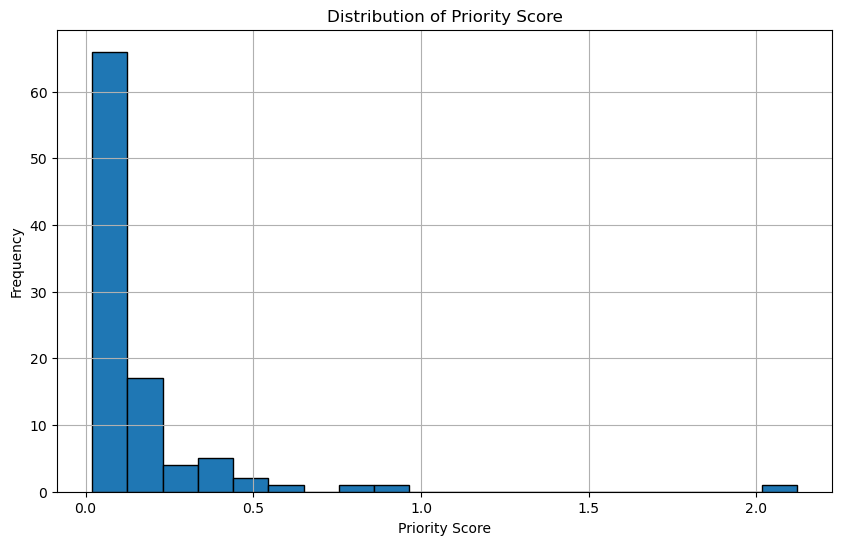

In [23]:
import pandas as pd
import os
import matplotlib.pyplot as plt
labels_df = pd.read_csv(os.path.join(r"/Users/martinli/Desktop/CancerGeneBot/data","LC_GWAS_Priority_Scores.csv"))
filtered_df = labels_df[labels_df['priority_score'].notna()]

# Display the distribution
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['priority_score'], bins=20, edgecolor='black')
plt.title('Distribution of Priority Score')
plt.xlabel('Priority Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('y_dist.png')